<center> <H2> SAIC REMOTE INTERNSHIP 2022 RECRUITMENT MACHINE LEARNING TASK</center>

<center> <H3> Prepared by Yusuf Okunlola </center>

**Instructions**

- Ensure that you observe good programming practices such as commenting well on your codes and using reasonable variable names. 

- Also ensure to space out your codes for readability.

### Task 2: Weather Prediction

The goal of this task is to compare the performance of different AI models for the prediction of weather condition. 

Step 1:
- Using the given weather dataset, train five different AI classifiers to predict the weather
condition. 
- Classifiers include: K Nearest neighbor classifier, Support vector classifier, Decision Tree classifier, Random forest classifier, K-Means Clustering

Step 2:
- Represent the classification performance of all your models using a confusion matrix or any other suitable graph.
- Make a bar graph illustrating the different test accuracies achieved by each of the implemented models. 

Step 3:
- Submit a zip file containing your programming codes and the generated results. 
- Include a PDF file explaining your work. 

Dataset: https://www.kaggle.com/datasets/muthuj7/weather-dataset

**Outline**

1. [Import Libraries](#Import-Libraries)
2. [Data Validation](#Data-Validation)
3. [Exploratory Analysis](#Exploratory-Analysis)
4. [Modeling](#Modeling)
5. [Communicate Results](#Communicate-Results)

# Import Libraries

In [1]:
# import libraries
import numpy as np
import pandas as pd

# visualization libraries
import matplotlib.pyplot as plt
import seaborn as sns  
sns.set_style(style='white') 

from sklearn.preprocessing import OrdinalEncoder
from sklearn.model_selection import train_test_split 
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import  f1_score, confusion_matrix, plot_confusion_matrix
from sklearn.preprocessing import StandardScaler


# import classification models
from sklearn.neighbors import KNeighborsClassifier  # K Nearest Neighbors Classifier
from sklearn.svm import SVC                         # Support Vector Classifier
from sklearn.tree import DecisionTreeClassifier     # Decision Tree Classifier
from sklearn.ensemble import RandomForestClassifier # Random Forest Classifier
from sklearn.cluster import KMeans                  # K-Means Clustering

import warnings
warnings.filterwarnings("ignore", category=FutureWarning)

In [2]:
# load dataset using pandas library
df = pd.read_csv("dataset/weatherHistory.csv")

# inspect dataframe by printing out the first 5 rows
df.head()

,Formatted Date,Summary,Precip Type,Temperature (C),Apparent Temperature (C),Humidity,Wind Speed (km/h),Wind Bearing (degrees),Visibility (km),Loud Cover,Pressure (millibars),Daily Summary
0,2006-04-01 00:00:00.000 +0200,Partly Cloudy,rain,9.472222,7.388889,0.89,14.1197,251.0,15.8263,0.0,1015.13,Partly cloudy throughout the day.
1,2006-04-01 01:00:00.000 +0200,Partly Cloudy,rain,9.355556,7.227778,0.86,14.2646,259.0,15.8263,0.0,1015.63,Partly cloudy throughout the day.
2,2006-04-01 02:00:00.000 +0200,Mostly Cloudy,rain,9.377778,9.377778,0.89,3.9284,204.0,14.9569,0.0,1015.94,Partly cloudy throughout the day.
3,2006-04-01 03:00:00.000 +0200,Partly Cloudy,rain,8.288889,5.944444,0.83,14.1036,269.0,15.8263,0.0,1016.41,Partly cloudy throughout the day.
4,2006-04-01 04:00:00.000 +0200,Mostly Cloudy,rain,8.755556,6.977778,0.83,11.0446,259.0,15.8263,0.0,1016.51,Partly cloudy throughout the day.


In [3]:
# check the number of rows and columns in the dataset
df.shape

(96453, 12)

In [4]:
# information about the dataset
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 96453 entries, 0 to 96452
Data columns (total 12 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Formatted Date            96453 non-null  object 
 1   Summary                   96453 non-null  object 
 2   Precip Type               95936 non-null  object 
 3   Temperature (C)           96453 non-null  float64
 4   Apparent Temperature (C)  96453 non-null  float64
 5   Humidity                  96453 non-null  float64
 6   Wind Speed (km/h)         96453 non-null  float64
 7   Wind Bearing (degrees)    96453 non-null  float64
 8   Visibility (km)           96453 non-null  float64
 9   Loud Cover                96453 non-null  float64
 10  Pressure (millibars)      96453 non-null  float64
 11  Daily Summary             96453 non-null  object 
dtypes: float64(8), object(4)
memory usage: 8.8+ MB


In [5]:
# Check the datatype counts of the dataset
df.dtypes.value_counts()

float64    8
object     4
dtype: int64

# Data Validation

In [6]:
# check for percentage of missing values
df.isnull().sum() / len(df)

Formatted Date              0.00000
Summary                     0.00000
Precip Type                 0.00536
Temperature (C)             0.00000
Apparent Temperature (C)    0.00000
Humidity                    0.00000
Wind Speed (km/h)           0.00000
Wind Bearing (degrees)      0.00000
Visibility (km)             0.00000
Loud Cover                  0.00000
Pressure (millibars)        0.00000
Daily Summary               0.00000
dtype: float64

The only feature having missing values in the dataset is 'Precip Type'.

Before treating the misssing values, let us inspect the variables in the feature.

In [7]:
# inspect the variables in the "Precip Type" field
df["Precip Type"].value_counts()

rain    85224
snow    10712
Name: Precip Type, dtype: int64

This is a weather prediction dataset, we will use the 'forward fill' method for missing data treatment.

In [8]:
# filling missing value using fillna() 
df['Precip Type'].fillna(method='ffill', inplace=True)

In [9]:
# check for low- and high-cardinality features
df.nunique()

Formatted Date              96429
Summary                        27
Precip Type                     2
Temperature (C)              7574
Apparent Temperature (C)     8984
Humidity                       90
Wind Speed (km/h)            2484
Wind Bearing (degrees)        360
Visibility (km)               949
Loud Cover                      1
Pressure (millibars)         4979
Daily Summary                 214
dtype: int64

The feature, 'Loud Cover' will be dropped because it has low cardinality and to avoid singularity error.

In [10]:
# drop feature with low-cardinality
df.drop(['Loud Cover'], axis=1, inplace=True)

In [11]:
# the features 'Formatted Date' and 'Daily Summary' will be dropped due to high-cardinality
df.drop(['Formatted Date', 'Daily Summary'], axis=1, inplace=True)

In [12]:
df.head()

,Summary,Precip Type,Temperature (C),Apparent Temperature (C),Humidity,Wind Speed (km/h),Wind Bearing (degrees),Visibility (km),Pressure (millibars)
0,Partly Cloudy,rain,9.472222,7.388889,0.89,14.1197,251.0,15.8263,1015.13
1,Partly Cloudy,rain,9.355556,7.227778,0.86,14.2646,259.0,15.8263,1015.63
2,Mostly Cloudy,rain,9.377778,9.377778,0.89,3.9284,204.0,14.9569,1015.94
3,Partly Cloudy,rain,8.288889,5.944444,0.83,14.1036,269.0,15.8263,1016.41
4,Mostly Cloudy,rain,8.755556,6.977778,0.83,11.0446,259.0,15.8263,1016.51


In [13]:
# plot summary statistics 
df.describe()

,Temperature (C),Apparent Temperature (C),Humidity,Wind Speed (km/h),Wind Bearing (degrees),Visibility (km),Pressure (millibars)
count,96453.000000,96453.000000,96453.000000,96453.000000,96453.000000,96453.000000,96453.000000
mean,11.932678,10.855029,0.734899,10.810640,187.509232,10.347325,1003.235956
std,9.551546,10.696847,0.195473,6.913571,107.383428,4.192123,116.969906
min,-21.822222,-27.716667,0.000000,0.000000,0.000000,0.000000,0.000000
25%,4.688889,2.311111,0.600000,5.828200,116.000000,8.339800,1011.900000
50%,12.000000,12.000000,0.780000,9.965900,180.000000,10.046400,1016.450000
75%,18.838889,18.838889,0.890000,14.135800,290.000000,14.812000,1021.090000
max,39.905556,39.344444,1.000000,63.852600,359.000000,16.100000,1046.380000


From the summary statistics of the numeric features, it was observed that no outlier values were present as the values fell within the range.

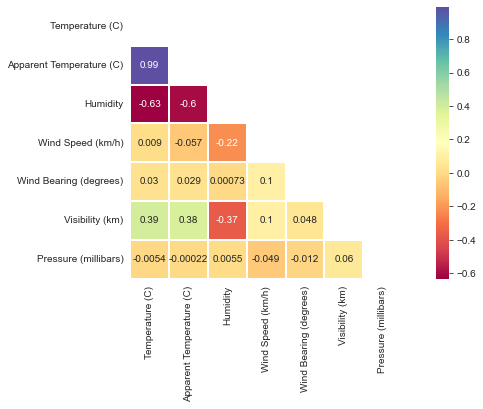

In [14]:
# visualize the correlation coefficient of the features
plt.figure(figsize=(12,5))
corrMatrix = df.corr()
mask = np.triu(corrMatrix)
sns.heatmap(corrMatrix, annot=True,linewidths=.3, mask=mask, cmap='Spectral', square=True)
plt.show()

In [15]:
# drop columns with multicolinearity
# from the correlation visualization, it can be infered that 'Temperature (C)'	and 'Apparent Temperature (C)' are highly correlated

df.drop(['Apparent Temperature (C)'], axis=1, inplace=True)

# Exploratory Analysis

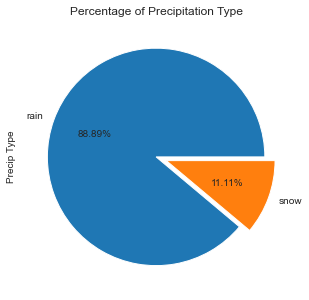

In [16]:
# compute percentage of 'Precip Type' feature
df["Precip Type"].value_counts().plot(kind='pie', autopct='%1.2f%%', explode=[0,0.1], figsize=(12,5))
plt.title('Percentage of Precipitation Type')
plt.show()

In [17]:
# check the distribution of the Summary variable
df['Summary'].value_counts()

Partly Cloudy                          31733
Mostly Cloudy                          28094
Overcast                               16597
Clear                                  10890
Foggy                                   7148
Breezy and Overcast                      528
Breezy and Mostly Cloudy                 516
Breezy and Partly Cloudy                 386
Dry and Partly Cloudy                     86
Windy and Partly Cloudy                   67
Light Rain                                63
Breezy                                    54
Windy and Overcast                        45
Humid and Mostly Cloudy                   40
Drizzle                                   39
Breezy and Foggy                          35
Windy and Mostly Cloudy                   35
Dry                                       34
Humid and Partly Cloudy                   17
Dry and Mostly Cloudy                     14
Rain                                      10
Windy                                      8
Humid and 

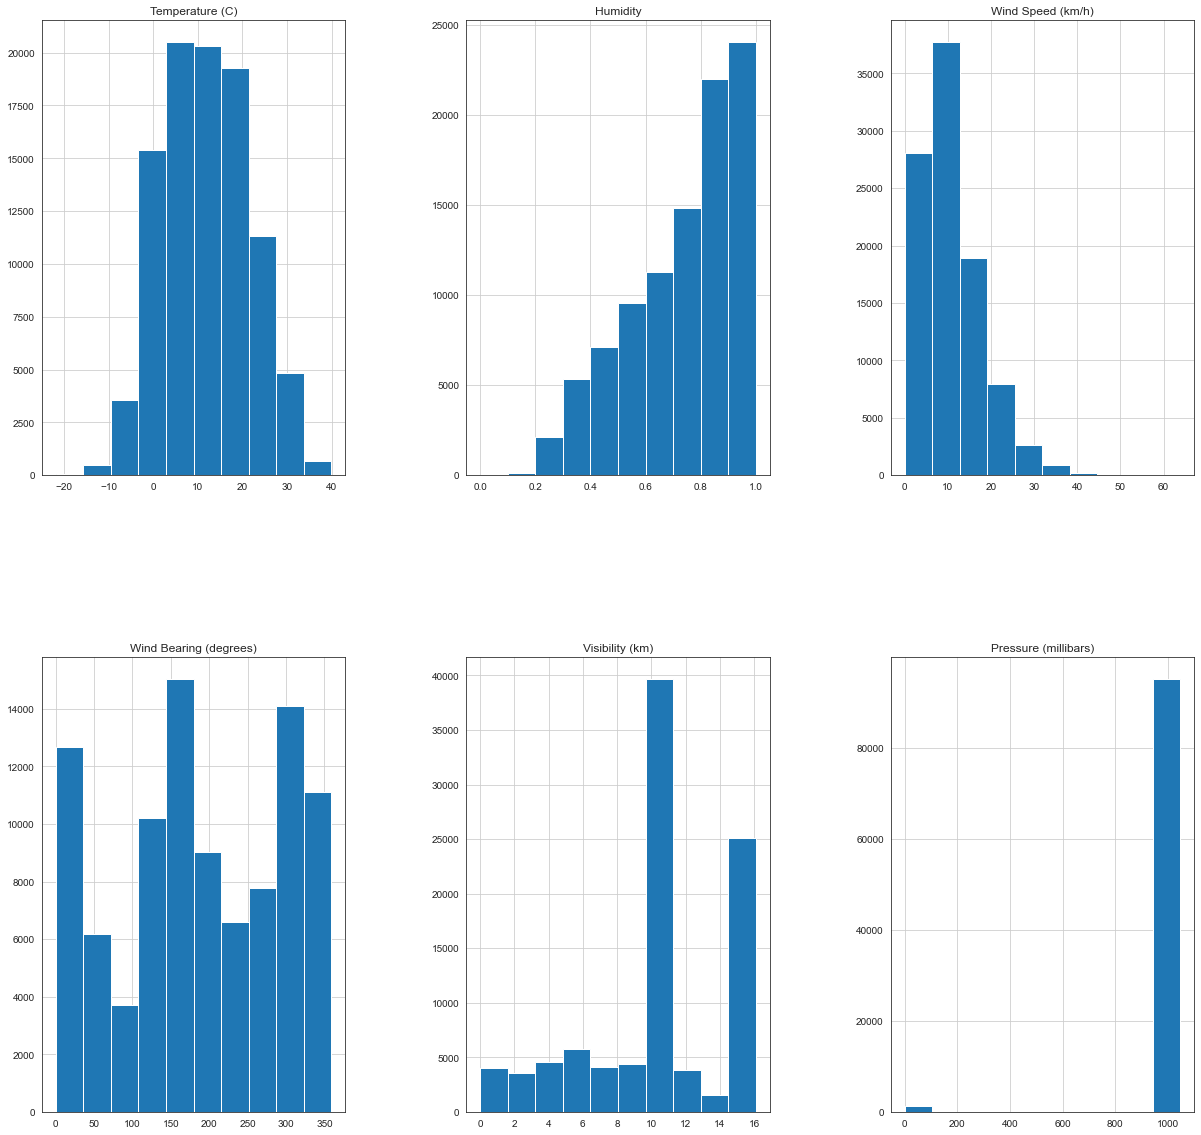

In [18]:
# Histogram plot of features
df.hist(grid=True, layout=(3,3) )
plt.subplots_adjust(left=0.1,bottom=0.1,  right=0.9, top=0.9,  wspace=0.4, hspace=0.4)           
plt.gcf().set_size_inches(20,30)
plt.show()

In [19]:
df.columns

Index(['Summary', 'Precip Type', 'Temperature (C)', 'Humidity',
       'Wind Speed (km/h)', 'Wind Bearing (degrees)', 'Visibility (km)',
       'Pressure (millibars)'],
      dtype='object')

In [20]:
# encode the categorical variables to numeric
# rain = 1, snow = 0

def rain(x):
    if x == 'rain':
        return int(1)
    else:
        return int(0)
    
df['Precip Type'] = df['Precip Type'].apply(rain)

In [21]:
# for modeling purpose, encode categorical variables to numeric using Ordinal Encoder
cat_col = ["Summary"]
ord_enc = OrdinalEncoder()
df[cat_col] = ord_enc.fit_transform(df[cat_col])

In [22]:
# check the dataset if the encoding has been done
df.head()

,Summary,Precip Type,Temperature (C),Humidity,Wind Speed (km/h),Wind Bearing (degrees),Visibility (km),Pressure (millibars)
0,19.0,1,9.472222,0.89,14.1197,251.0,15.8263,1015.13
1,19.0,1,9.355556,0.86,14.2646,259.0,15.8263,1015.63
2,17.0,1,9.377778,0.89,3.9284,204.0,14.9569,1015.94
3,19.0,1,8.288889,0.83,14.1036,269.0,15.8263,1016.41
4,17.0,1,8.755556,0.83,11.0446,259.0,15.8263,1016.51


In [23]:
# save prepared dataset to csv file
df.to_csv("dataset/weatherHistory_prepared.csv", index=False)

In [24]:
# split data into feature matrix 'X' and target vector 'y'
target = "Precip Type"
X = df.drop(columns=target).values
y = df[target].values

In [25]:
# split data into train and test sets - 80:20
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=10)

print("X_train shape:", X_train.shape)
print("y_train shape:", y_train.shape)
print("X_test shape:", X_test.shape)
print("y_test shape:", y_test.shape)

X_train shape: (77162, 7)
y_train shape: (77162,)
X_test shape: (19291, 7)
y_test shape: (19291,)


In [26]:
#  assert data split to avoid leakage
print(len(X_train) + len(X_test) == len(X))
print(len(y_train) + len(y_test) == len(y))

True
True


In [27]:
# standardize data
ss = StandardScaler()
scalled_x_train = ss.fit_transform(X_train)
scalled_x_test = ss.transform(X_test)

**Report**

- The piechart reveals that 88.9% of rainfall while 11.1% of snow.
- The categorical variables were encoded to numeric as this is necessary for machine learning.
- The explanatory variable (X) and response variable (y) were created and splitted train and test set.
- The train and test was standardized so as to keep all features within the same distance metric.

# Modeling 

In [28]:
# instantiate the models
modelclasses = {'KNN': KNeighborsClassifier(n_neighbors=3),
                'SVC': SVC(),
                'DecisionTree': DecisionTreeClassifier(), 
                'RandomForest': RandomForestClassifier(),
                'KMeans': KMeans(n_clusters=2)
                }

In [29]:
# Iteration of models

# create a list to store model results
cla_scores = []

for model_name, model_method in modelclasses.items():
    
    # fit model to training data
    model_method.fit(scalled_x_train, y_train)
    
    # predict the outcomes on the test set
    y_pred = model_method.predict(scalled_x_test)
    
    # evaluation metric for the model
    score = f1_score(y_test, y_pred, average='weighted')
    
    # append the results to the list
    cla_scores.append(score)
cla_results = pd.DataFrame({"Model":modelclasses.keys(), "Score": cla_scores})

# sort the results in descending order
cla_results.sort_values(by = 'Score', ascending = False)

,Model,Score
2,DecisionTree,1.000000
3,RandomForest,1.000000
1,SVC,0.994211
0,KNN,0.979981
4,KMeans,0.736127


# Communicate Results

**Models f1_score bar chart**

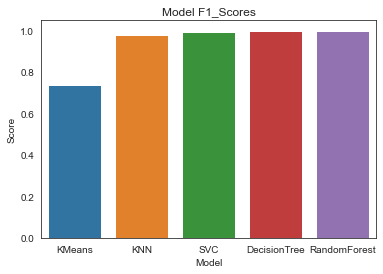

In [30]:
# Build bar chart, label axes, add title and show plot
sns.barplot(x='Model', y='Score', data=cla_results, order=cla_results.sort_values('Score').Model)
plt.xlabel("Model")
plt.ylabel("Score")
plt.title("Model F1_Scores")
plt.show()

**Confusion matrix plot**

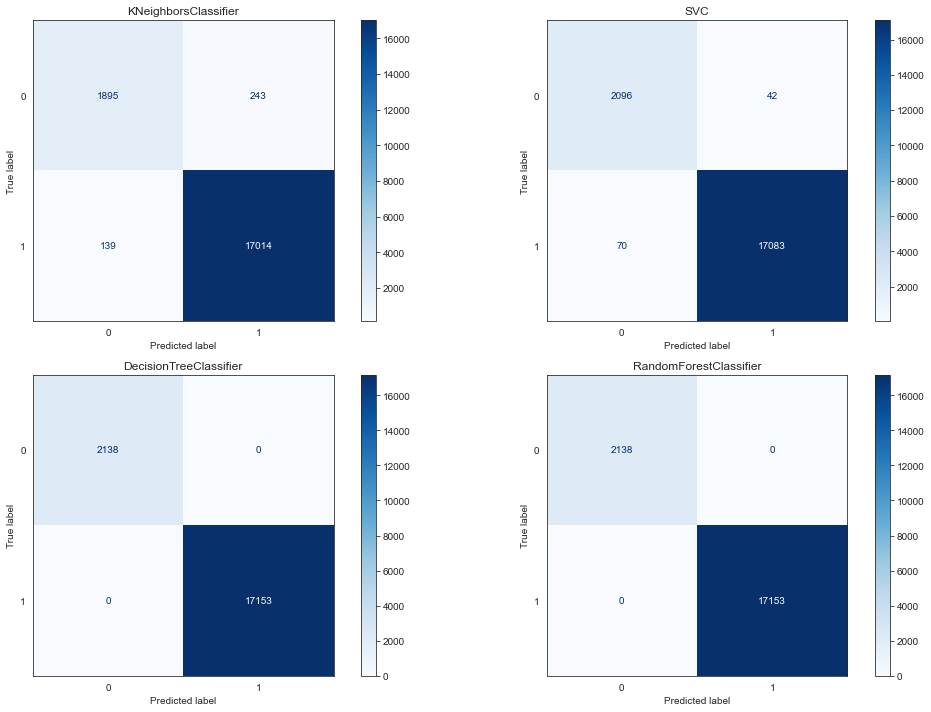

In [31]:
# instantiate models
classifiers = [KNeighborsClassifier(n_neighbors=3),
               SVC(),
               DecisionTreeClassifier(), 
               RandomForestClassifier()
               ]

# fit models to training data
for cls in classifiers:
    cls.fit(scalled_x_train, y_train)

# set plot size
fig, axes = plt.subplots(nrows=2, ncols=2, figsize=(15,10))
target_names = ['0','1'] # 0 = snow, 1 = rain


for cls, ax in zip(classifiers, axes.flatten()):
    
    # plot confusion matrix of the outcomes on the test set
    plot_confusion_matrix(cls, 
                          scalled_x_test, 
                          y_test, 
                          ax=ax, 
                          cmap='Blues',
                          display_labels=target_names,
                          values_format='')
    # set title
    ax.title.set_text(type(cls).__name__)
    
plt.tight_layout()  
plt.show()

**KMeans Clustering Classification plot of Confusion matrix**

[[  123  2015]
 [11127  6026]]


<AxesSubplot:>

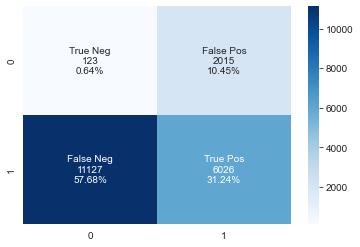

In [32]:
# instantiate classification model
kmeans_clf = KMeans(n_clusters=2)

# fit model to training data
kmeans_clf.fit(scalled_x_train, y_train)
# instantiate classification model

# predict the outcomes on the test set
kmeans_clf_y_pred = kmeans_clf.predict(scalled_x_test)

# confusion matrix evaluation metric
cf_matrix = confusion_matrix(y_test, kmeans_clf_y_pred)

# print confusion matrix
print(cf_matrix)

# visualize confusion matrix
group_names = ['True Neg','False Pos','False Neg','True Pos']
group_counts = ['{0:0.0f}'.format(value) for value in
                cf_matrix.flatten()]

# show percentages
group_percentages = ['{0:.2%}'.format(value) for value in
                     cf_matrix.flatten()/np.sum(cf_matrix)]

# declare labels
labels = [f'{v1}\n{v2}\n{v3}' for v1, v2, v3 in
          zip(group_names,group_counts,group_percentages)]
labels = np.asarray(labels).reshape(2,2)


# plot the heatmap
sns.heatmap(cf_matrix, annot=labels, fmt='', cmap='Blues')

**Results**

- Confusion matrix metric was used to compare the models as it generated the true and false values of the predictions.
- F1 score metric was used as it gave an optimal blend of recall and precision metrics for imbalanced classification problem.
- From the model evaluation as revealed by the confusion matrix and the F1 Score metric, it can be concluded that the Decision Tree model and Random Forest model gave accurate predictions.
- In conclusion, the results obtained by these models will influence decisions on agricultural activities such as planting and harvesting for the future as well as mitigating the dangerous effects of climate change.

**Note on Confusion Matrix**

True Positives (TP): These are cases in which we predicted yes (there will be rain), and it actually rained.

True Negatives (TN): We predicted no rain, and the it was snowy.

False Positives (FP): We predicted rain, but the weather was snowy. (Also known as a "Type I error.")

False Negatives (FN): We predicted snow, but it rained. (Also known as a "Type II error.")